# Neural Network from scratch

In [1]:
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt

In [2]:
X, y = sklearn.datasets.make_moons(200, noise=0.20)

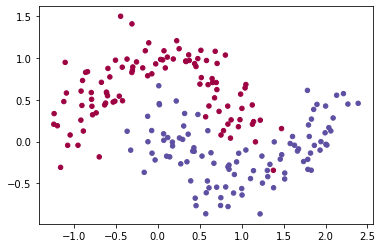

In [10]:
plt.scatter(X[:,0], X[:,1], s=20, c=y, cmap=plt.cm.Spectral);

> The data is not linearly seperable. So something like Logistic regression won't be able to do a good job at classifying the data. Unless we engineer some polynomial features. 

### Logistic Regression example

In [12]:
from sklearn.linear_model import LogisticRegression

In [14]:
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression()

In [15]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

Text(0.5, 1.0, 'Logistic Regression')

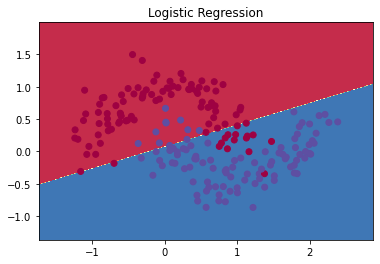

In [16]:
# Plot the decision boundary
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")

## Building a simple neural network

#### Initializing some variables

In [19]:
# Defining some useful variables
num_examples = len(X) # training set size
nn_input_dim = 2
nn_output_dim = 2

In [20]:
### Defining some parameters for gradient descent
epsilon = 0.01  # learning rate
reg_lambda = 0.01  # Regulurization

#### defining the loss function
(Cross entropy loss)

In [26]:
def calculate_loss(model):
    W1, b1, W2, b2 = model["W1"], model["b1"], model["W2"], model["b2"]
    # forward propagation to calculate predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)                                         # softmax
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)  # softmax
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regularization term to loss (optional)
    
    return 1./num_examples

#### Helper function that predicts output

In [23]:
# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

#### Function to train the neural netrwork

In [24]:
# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_lost: if True, print the loss every 1000 iterations

def build_model(nn_hdim, num_passes=20000, print_loss=False):
    
    # Initialize the parameters to random values
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
    
    # we will return this at the end
    model = {}
    
    # Gradient Descent
    for i in range(0, num_passes):
        
        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        
        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)
        
        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
        
        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
          print("Loss after iteration %i: %f" %(i, calculate_loss(model)))
        
    return model

Loss after iteration 0: 0.005000
Loss after iteration 1000: 0.005000
Loss after iteration 2000: 0.005000
Loss after iteration 3000: 0.005000
Loss after iteration 4000: 0.005000
Loss after iteration 5000: 0.005000
Loss after iteration 6000: 0.005000
Loss after iteration 7000: 0.005000
Loss after iteration 8000: 0.005000
Loss after iteration 9000: 0.005000
Loss after iteration 10000: 0.005000
Loss after iteration 11000: 0.005000
Loss after iteration 12000: 0.005000
Loss after iteration 13000: 0.005000
Loss after iteration 14000: 0.005000
Loss after iteration 15000: 0.005000
Loss after iteration 16000: 0.005000
Loss after iteration 17000: 0.005000
Loss after iteration 18000: 0.005000
Loss after iteration 19000: 0.005000


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 3')

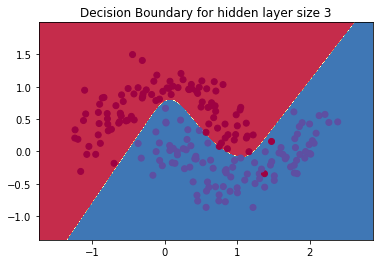

In [27]:
# Build a model with a 3-dimensional hidden layer
model = build_model(3, print_loss=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")

### Tuning the hidden layer size of the nn

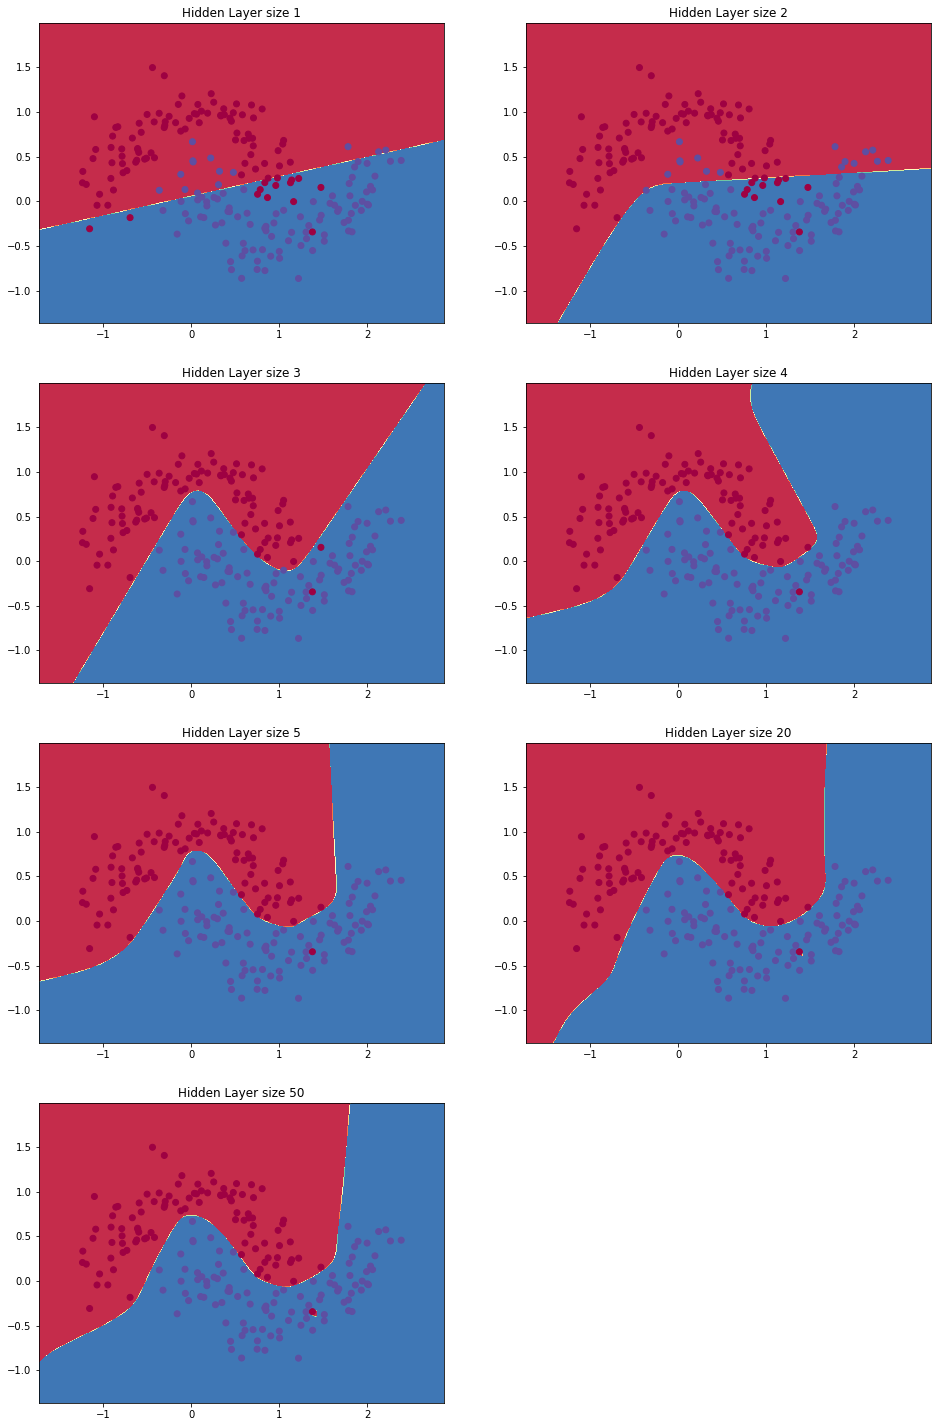

In [28]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x))
plt.show()

The more nodes in the hidden layer the more complicated the model, which is computationally expensive, which is also prone to overfitting. You could use regularization to prevent overfitting, but choosing less nodes in the hidden layer is probably a more economical solution

#### Exercises
Here are some things you can try to become more familiar with the code:

1. Instead of batch gradient descent, use minibatch gradient descent (more info) to train the network. Minibatch gradient descent typically performs better in practice.
2. We used a fixed learning rate $\epsilon$ for gradient descent. Implement an annealing schedule for the gradient descent learning rate (more info).
3. We used a $\tanh$ activation function for our hidden layer. Experiment with other activation functions (some are mentioned above). Note that changing the activation function also means changing the backpropagation derivative.
4. Extend the network from two to three classes. You will need to generate an appropriate dataset for this.
5. Extend the network to four layers. Experiment with the layer size. Adding another hidden layer means you will need to adjust both the forward propagation as well as the backpropagation code.